In [ ]:
# This is a practice jupyter lab project for running the analysis of HRE microbiome data. 
# I already did this in RStudio locally, so I have the commans. But want to test out Jupyter labs

In [ ]:
# Put all packages in an "install.R" file and made runtime.txt file

In [9]:
library(stats)
library(tidyverse)
library(vegan)
library(ggthemes)
library(reshape2)
library(devtools)
library(viridis)
library("knitr")
library("BiocManager")

.cran_packages <- c("ggplot2", "gridExtra")
.bioc_packages <- c("dada2", "phyloseq", "DECIPHER", "phangorn")
.inst <- .cran_packages %in% installed.packages()
if(any(!.inst)) {
  install.packages(.cran_packages[!.inst])
}

.inst <- .bioc_packages %in% installed.packages()
if(any(!.inst)) {
  install(.bioc_packages[!.inst], ask = F)
}

# Load packages into session, and print package version
sapply(c(.cran_packages, .bioc_packages), require, character.only = TRUE)

Loading required package: gridExtra


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: dada2

Loading required package: Rcpp

Loading required package: phyloseq

Loading required package: DECIPHER

Loading required package: Biostrings

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following object is masked from ‘package:gridExtra’:

    combine


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append,

ggplot2 gridExtra     dada2  phyloseq  DECIPHER  phangorn 
     TRUE      TRUE      TRUE      TRUE      TRUE      TRUE

In [5]:
metadata_ps <- read.csv(file="SeqAnalysis_mod/sample-metadata_phyloseq.csv", row.names = 1)


In [8]:
# Import taxonomy and count tables
count_table <- read_csv(file="asv_table.csv", skip = 1)
taxonomy <- read_csv(file="taxonomy_table.csv")
taxonomy <- taxonomy[-c(1),] 


Parsed with column specification:
cols(
  .default = col_double(),
  `#OTU ID` = col_character()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  `Feature ID` = col_character(),
  Taxon = col_character(),
  Confidence = col_character()
)



In [10]:
# Remove characters and separate taxa names
taxonomy <-  taxonomy %>%
  mutate(taxonomy=str_replace_all(string=Taxon, pattern="D_\\d*\\__", replacement="")) %>%
  mutate(taxonomy=str_replace_all(string=taxonomy, pattern=";$", replacement="")) %>%
  separate(taxonomy, into=c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus","Species"), sep=";")
colnames(taxonomy)[1] <- colnames(count_table)[1]

taxonomy_ps	=	as.matrix(taxonomy)
taxonomy_ps <- subset(taxonomy_ps, select = -c(Taxon, Confidence))
rownames(taxonomy_ps) <- subset(taxonomy_ps, select = c('#OTU ID'))
taxonomy_ps <- subset(taxonomy_ps, select = -c(1))


count_table_ps <- read.csv(file="SeqAnalysis_mod/table.csv", row.names = 1)
otu_table	=	as.matrix(count_table_ps)

phy_tree = read_tree("SeqAnalysis_mod/tree.nwk")


Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 3944 rows [1, 3, 4, 6, 12, 13, 17, 19, 20, 21, 26, 29, 31, 35, 36, 37, 38, 43, 45, 48, ...].”


In [13]:
#	import	as	phyloseq	objects (phy_tree is already)
OTU	=	otu_table(count_table_ps,	taxa_are_rows	=	TRUE)
TAX	=	tax_table(taxonomy_ps)
META	=	sample_data(metadata_ps)




In [14]:
#	check	that	your	OTU	names	are	consistent	across	objects
taxa_names(TAX)
taxa_names(OTU)
taxa_names(phy_tree)

[1] "e39494332a51f284d0a5b18f77297277" "d6c3280e0b453e32bb0f5848a8adf5ca"
   [3] "9404163724571a398aa4869436759308" "028058ffc2ff7988449b2eda71d267db"
   [5] "f22ea8603e4c6e7ed0313dfb71acdb1b" "b3f916eb895596b0aab5ce67c710cf3d"
   [7] "d806a7c6845f6c50f890e0b11fe652de" "13239bfd601be5658be2653f6caf8aa3"
   [9] "f762fc06a47ae561a60323d8bd6f405a" "f637ea7b3ef52b3415d209c09447f941"
  [11] "96714508a6fea480041ace7d01bf2048" "ed59e9f608568c35f72e987ca3189dfc"
  [13] "6fd41b87609aa26d165c06c377fe1af2" "83b10ccbf2734f44be635405d4afab78"
  [15] "f1cc90a34338cd248d6cde6ff20f6a20" "a133a24b4a69605f6866addd84018039"
  [17] "711cdee9b83a816ef327fea01338957c" "6ea794aa47071a501015fbad65dd1575"
  [19] "84a79b9e6548f9624d2d758e5030b18a" "c7afbd062dae23491d83984fe4386c9c"
  [21] "6f1ef5652fec7baf3341adf218299edb" "98b4799119283d1389a0151e222832cd"
  [23] "f4abd32ff2c89cbbf103dd8a13d63d7c" "91247b8e53a048da3d777777284d8dad"
  [25] "fbbc649b1c6ec671b3ad2248ffc21563" "e9152853e1d8630f9e0a26870da742a9"
  [27] "5fbd67cda1e78321177bd4c3762d720f" "ec884156bfdaa8333e0a800b35a71d54"
  [29] "e66893ec9c61f9999656e619c08ae986" "b9dc48f4d98a8df739a779de4f256941"
  [31] "bb1aede821f34ae2ff572dd104ab9edc" "02ee69101655c2c379be21482892c23c"
  [33] "352802c9d8be8d8759fb43d289b818f6" "df4ae84d1e62e9ba7a0a5fb518d5b126"
  [35] "132244e7d03cc5f4e29a59d9440488e7" "95b599ea0ddc5a65f29d8e807785011c"
  [37] "a5e9e3253c3a817795de811b3b7876ad" "a43f1cb4098183bc58828a5f288249e0"
  [39] "fa54247f3b7a2194cf8f626d65d4702a" "4559f6a9fd835b9be8f0739368d8f53f"
  [41] "8f32458565405e1b1289023dcc7a7a30" "1669e6d156bac4e9fcbd417984f0fa4e"
  [43] "fab3fd2d494ec2e8b120285baf2cd86e" "3ce959760e4b3803582b759724eaaa38"
  [45] "9188c24f140f94e8133b1e9209043bcd" "2cfe9c4ed0fd92fcfca5a74bb15ef2fd"
  [47] "7c59725d24ec30e3c5256fe9535d1326" "b0b0444599635c47adaf7c1f1a54e4a2"
  [49] "909cbd770e2d89488fb56dd322c35de8" "67ac549da21a17a110ff42822094d9f1"
  [51] "c27bb6051d564d1aedffa8a2cb41a5a2" "97167836f307b02f8dfcfdcaf258ff9d"
  [53] "b91b40224c30a4f55e2af06b4ae7a7b5" "5aab9e30717dbac2cbbbe34061a0fbef"
  [55] "31a7e2641c6f77875c6138ec88b1fff0" "d6deb335f8d88b70d0f6401cd3b9a115"
  [57] "49a8b545a28cdd683ff7b535c0324b84" "d42aaf2d70c9619f285da86377e34511"
  [59] "7593069ddf9d1dd34dc550f0c5b4e1b0" "68fa0b6bee83a8adc9a1c17fb4c0632b"
  [61] "d655802d9a77cd3b46070d6a9d394236" "a150a57778b613f56ffa16f7099c3586"
  [63] "fed32c6f9955170f16fb56c02e72e16c" "5a456dafe2653d3af36f8be08d64c527"
  [65] "152bc1384a7c013e81ee6895ddad6cf7" "5981fccf89a0cd3c6e4a5aef57a913e6"
  [67] "0a012fac7c09eff52e1dc5ff790e672e" "d38de71016bf2f35f5ec5fe27be9ef94"
  [69] "3d1267a942d522df20f95e75ef048a5c" "6bb945444cfef38bd4040c46f73d2386"
  [71] "1fc9ddc6c7c862c7be8fe64a3d2fae4d" "12df5db00c0cbcb87e6e65b2b38f1804"
  [73] "29b21b000d2ab8ed121326e8502e3764" "034856416297c1120eadadc3dbc0de65"
  [75] "6401c6579cefe72c5db457a5b78d27aa" "54c0d335ecea2554b8e643f538fe19fd"
  [77] "d96cfe315c37a9c8306351fa96f635da" "8b3c70f0a85c54381841af9b6d5e3e92"
  [79] "e9b68c0f087795229a10c742e2fe8c2a" "9ef7b4dc5fefca2b17be2d3129fb4422"
  [81] "20492d4e8acdc9623d447e7c4b6e2b5b" "4a83156b9296993ba23cb149f2315949"
  [83] "317116344c2a65a2da4eb764ff073cfd" "cd73b5778b40361d9cd6ae7bf2b34db6"
  [85] "a429259c703b5efbdb4e3d3aa0c0f1c7" "42372964f4318e16367fff6dee5a0668"
  [87] "5d5972a4cbd35da36b184d03923d1865" "ccc81b94e2c451dbd0c3bbb0df531486"
  [89] "ef569b91a524a657ab8cb74ec6860d51" "2af3c75dc170116b7b57eeb60f5e69a2"
  [91] "ef541bf00a738924c00d1e0119d60e20" "80f811d6cda5de6913ef28d372232dd6"
  [93] "e52959aed4c478a416990af8d9c1a130" "7588a5ae697796352c6da36b9385e2fa"
  [95] "4be8faf1a7660c1a6ef6a2f9569d0111" "d7d3747fcdb4cd726b650203a0b8fa32"
  [97] "93a476ee41a88e18e4ace13e4b709a3f" "6eb5e36d0fdbe6231bc254955fb2cbba"
  [99] "fe807a291beb7c08baa8c2cac4c0d8ba" "9616fc0bf6da4c4c8afec3159a58d877"
 [101] "30d93984a2948563ea7298fcb5f91c83" "c47030e584e8dc7108b7275eae0f64db"
 [103] "8bc1b57bcb718da5ae9e0b7c600b0180" "5b8c4497b36bcb455fa542587a47bbce"

[1] "e39494332a51f284d0a5b18f77297277" "d6c3280e0b453e32bb0f5848a8adf5ca"
   [3] "9404163724571a398aa4869436759308" "028058ffc2ff7988449b2eda71d267db"
   [5] "f22ea8603e4c6e7ed0313dfb71acdb1b" "b3f916eb895596b0aab5ce67c710cf3d"
   [7] "d806a7c6845f6c50f890e0b11fe652de" "13239bfd601be5658be2653f6caf8aa3"
   [9] "f762fc06a47ae561a60323d8bd6f405a" "f637ea7b3ef52b3415d209c09447f941"
  [11] "96714508a6fea480041ace7d01bf2048" "ed59e9f608568c35f72e987ca3189dfc"
  [13] "6fd41b87609aa26d165c06c377fe1af2" "83b10ccbf2734f44be635405d4afab78"
  [15] "f1cc90a34338cd248d6cde6ff20f6a20" "a133a24b4a69605f6866addd84018039"
  [17] "711cdee9b83a816ef327fea01338957c" "6ea794aa47071a501015fbad65dd1575"
  [19] "84a79b9e6548f9624d2d758e5030b18a" "c7afbd062dae23491d83984fe4386c9c"
  [21] "6f1ef5652fec7baf3341adf218299edb" "98b4799119283d1389a0151e222832cd"
  [23] "f4abd32ff2c89cbbf103dd8a13d63d7c" "91247b8e53a048da3d777777284d8dad"
  [25] "fbbc649b1c6ec671b3ad2248ffc21563" "e9152853e1d8630f9e0a26870da742a9"
  [27] "5fbd67cda1e78321177bd4c3762d720f" "ec884156bfdaa8333e0a800b35a71d54"
  [29] "e66893ec9c61f9999656e619c08ae986" "b9dc48f4d98a8df739a779de4f256941"
  [31] "bb1aede821f34ae2ff572dd104ab9edc" "02ee69101655c2c379be21482892c23c"
  [33] "352802c9d8be8d8759fb43d289b818f6" "df4ae84d1e62e9ba7a0a5fb518d5b126"
  [35] "132244e7d03cc5f4e29a59d9440488e7" "95b599ea0ddc5a65f29d8e807785011c"
  [37] "a5e9e3253c3a817795de811b3b7876ad" "a43f1cb4098183bc58828a5f288249e0"
  [39] "fa54247f3b7a2194cf8f626d65d4702a" "4559f6a9fd835b9be8f0739368d8f53f"
  [41] "8f32458565405e1b1289023dcc7a7a30" "1669e6d156bac4e9fcbd417984f0fa4e"
  [43] "fab3fd2d494ec2e8b120285baf2cd86e" "3ce959760e4b3803582b759724eaaa38"
  [45] "9188c24f140f94e8133b1e9209043bcd" "2cfe9c4ed0fd92fcfca5a74bb15ef2fd"
  [47] "7c59725d24ec30e3c5256fe9535d1326" "b0b0444599635c47adaf7c1f1a54e4a2"
  [49] "909cbd770e2d89488fb56dd322c35de8" "67ac549da21a17a110ff42822094d9f1"
  [51] "c27bb6051d564d1aedffa8a2cb41a5a2" "97167836f307b02f8dfcfdcaf258ff9d"
  [53] "b91b40224c30a4f55e2af06b4ae7a7b5" "5aab9e30717dbac2cbbbe34061a0fbef"
  [55] "31a7e2641c6f77875c6138ec88b1fff0" "d6deb335f8d88b70d0f6401cd3b9a115"
  [57] "49a8b545a28cdd683ff7b535c0324b84" "d42aaf2d70c9619f285da86377e34511"
  [59] "7593069ddf9d1dd34dc550f0c5b4e1b0" "68fa0b6bee83a8adc9a1c17fb4c0632b"
  [61] "d655802d9a77cd3b46070d6a9d394236" "a150a57778b613f56ffa16f7099c3586"
  [63] "fed32c6f9955170f16fb56c02e72e16c" "5a456dafe2653d3af36f8be08d64c527"
  [65] "152bc1384a7c013e81ee6895ddad6cf7" "5981fccf89a0cd3c6e4a5aef57a913e6"
  [67] "0a012fac7c09eff52e1dc5ff790e672e" "d38de71016bf2f35f5ec5fe27be9ef94"
  [69] "3d1267a942d522df20f95e75ef048a5c" "6bb945444cfef38bd4040c46f73d2386"
  [71] "1fc9ddc6c7c862c7be8fe64a3d2fae4d" "12df5db00c0cbcb87e6e65b2b38f1804"
  [73] "29b21b000d2ab8ed121326e8502e3764" "034856416297c1120eadadc3dbc0de65"
  [75] "6401c6579cefe72c5db457a5b78d27aa" "54c0d335ecea2554b8e643f538fe19fd"
  [77] "d96cfe315c37a9c8306351fa96f635da" "8b3c70f0a85c54381841af9b6d5e3e92"
  [79] "e9b68c0f087795229a10c742e2fe8c2a" "9ef7b4dc5fefca2b17be2d3129fb4422"
  [81] "20492d4e8acdc9623d447e7c4b6e2b5b" "4a83156b9296993ba23cb149f2315949"
  [83] "317116344c2a65a2da4eb764ff073cfd" "cd73b5778b40361d9cd6ae7bf2b34db6"
  [85] "a429259c703b5efbdb4e3d3aa0c0f1c7" "42372964f4318e16367fff6dee5a0668"
  [87] "5d5972a4cbd35da36b184d03923d1865" "ccc81b94e2c451dbd0c3bbb0df531486"
  [89] "ef569b91a524a657ab8cb74ec6860d51" "2af3c75dc170116b7b57eeb60f5e69a2"
  [91] "ef541bf00a738924c00d1e0119d60e20" "80f811d6cda5de6913ef28d372232dd6"
  [93] "e52959aed4c478a416990af8d9c1a130" "7588a5ae697796352c6da36b9385e2fa"
  [95] "4be8faf1a7660c1a6ef6a2f9569d0111" "d7d3747fcdb4cd726b650203a0b8fa32"
  [97] "93a476ee41a88e18e4ace13e4b709a3f" "6eb5e36d0fdbe6231bc254955fb2cbba"
  [99] "fe807a291beb7c08baa8c2cac4c0d8ba" "9616fc0bf6da4c4c8afec3159a58d877"
 [101] "30d93984a2948563ea7298fcb5f91c83" "c47030e584e8dc7108b7275eae0f64db"
 [103] "8bc1b57bcb718da5ae9e0b7c600b0180" "5b8c4497b36bcb455fa542587a47bbce"

[1] "69c52d9549009586775623d3a0bbcbef" "cb0463084f6ed509d3df1aa0f7a2e115"
   [3] "19aa0369c5add3d1191215eab2c947d1" "8afc45a9fbcbc4a33f477e547c1932a9"
   [5] "66205bbaeafdd1531c8288d2f8735fde" "92b51c82f97e6e8ee00ccd1b90552312"
   [7] "eaa86fa9732292b17837ffbd4237f606" "32aa84d6638e5f227af3fa99657389d8"
   [9] "3eaa9ff566ad80c0f77d4e849897ef10" "ef701d5160404f00672c51d5f15bdac7"
  [11] "6d6b0fdbab639f455c6e7b3c88b821ce" "dacf34caef3458cb5f11f157d40cbd64"
  [13] "3b647d5399b0009b8a07b94ed4a74762" "983a36b0e702d54a3e1e0c38b2ffd89e"
  [15] "003e87932acaccbc34e30831b673cafc" "7018f0356c4535ef5f9cfdf4f8becb7b"
  [17] "0a0496692b594996901d865f68d98646" "a5686f8a0a960b1614e77cd2ac8c0e54"
  [19] "850bf1091605565617b9d7a3772580bd" "fc3b0a8898695e6fe0d09304bc786141"
  [21] "3d81fc0f878467f03f80c28f7b93bffa" "edd90aa465735ced809b021d53ebd343"
  [23] "b999c62ce4ebc1ad2390ed25879a88f7" "5febb0374e4c314eab32510598ea938b"
  [25] "0596b9a8a2a98d7bcb1123bd23321872" "832670d2e77693062345fea4b8f840e8"
  [27] "2e1619466eb899f250f9d8dabda59a0a" "374451e7be1274c53c41b8e1afa13eea"
  [29] "77603010a9dddfd1dddd2f1984c4e12d" "8bc5b978735bc4f87307cbb2341650cb"
  [31] "f123bd3941863b672a8858665383b2ec" "d71d471242aaf0809202f9553b09bb57"
  [33] "3dbe178947ff6c081b8b85ad8d6e594c" "1d5bb9ec1b33231801fcafa0461c1a08"
  [35] "10610271b711afa41f7eef913e64cdb2" "1447c116e31307b84ae0e52afb10dd57"
  [37] "ee3afe8af220e8b30c0d4647ee50cc8b" "d2aa4b5668e23e30c9ff78fa9bf1c3ae"
  [39] "0986a582f270dace3c0a30953c5a40e2" "f3ef355cd4d29c142f74217e02397bcf"
  [41] "5068c8c527d44c8e4abdc8085550432f" "a9e1f22c84a343856901eaa16354a8d0"
  [43] "9b50f8085124b85b86986b470bcc4701" "29ae4e77a8bbcb83bb8283518cd5b779"
  [45] "942758e28db852d713b7341b69fcc7fe" "eeb4b55634b3f315609a914276145ac5"
  [47] "85dadacdbbc992da246b80a30a5668fd" "0975c27176e02e19b563eaaf3885c54e"
  [49] "fdbf33cfbb746f5ecfcb80c773f9c8ba" "ebbfa94273dc5ac57a2365bd91a7f735"
  [51] "095175d3a47b23d72ce4d8896d496a73" "2fc5ecf675ae4c793862c4714e72ce29"
  [53] "42c278c5f4762d57c93f611c878f677c" "0239b9327698073225f3aa89cfc245c3"
  [55] "2cbca853407f45f9b88db8a55648ee3e" "c03779ed2df522561b6a7dcb072b5190"
  [57] "e84433cdf8573db079e3d596d6103c49" "e73eaaf95280d9c3c7481f9cc13b480c"
  [59] "5fc9bb5918a342d5f87fdb5c9be9ce29" "691e91d994b8838a8115e21b679c1fbc"
  [61] "801df6fff63c27aa05242cffac0d8a03" "8a8068be8e208701bde9704db4a6d5b8"
  [63] "f5bbac76fe060150114916a11bbb93fa" "6ad370e642cfe26ecfb5cde1c7674f33"
  [65] "414608bd166baddc12a9a752c101dc28" "822fe4d64ff4f85e15ebc32d20eb1678"
  [67] "5a7521f7df24b896d2da7135d76db590" "427ac058301c7ead71e0c32e14446dcd"
  [69] "8cb269b09c3e7b1cb97922d6d61d2934" "f1668fa63c35e28dd8b1270ba1936669"
  [71] "8cbe03ca32bb5d1cd36148d2f1761f67" "9bd68e4dd6b513b04b9ab66cdc1c607e"
  [73] "fa7bc71e6d23985729b60d46074cee0f" "39c3a83c4b15ac60bf84800a4a88fb25"
  [75] "06466d594ecf65f54b96a160dc1b5448" "b34d491fcf53382faedbf69ec09a3cc3"
  [77] "df657a30949584b69415310b35f7895b" "1fb393ba767dc004bbf1722105f4d196"
  [79] "1cb6736efcd8d70d6ea443c970368ec1" "8ac5a3e0d4c283480135f2335d5a0778"
  [81] "bf8c0ae8e4e71a7f2fbb6ea5f0ac1119" "4acfc32c48b9950a27e999897d84a8a2"
  [83] "fcdb76e868aa66372a63130831bc3919" "470f8dd72082fb0c9adb08af4b3614d3"
  [85] "63943e873af161866770dcac716c91ee" "5a110835804a61dc1f494ca5da3c34f5"
  [87] "ce06e9d951d2e22566b80f0974f6a0d5" "1a645ddbb49264b105cf246b2bab959d"
  [89] "7c0707ea277f0ee035355a96df4a5f21" "018b4c66fbe59a6e579224fadda27241"
  [91] "1e0af6d99e01cd9da9bd30d07bb4dd90" "b1cf36b64119a6655bd13602c3ba1c8f"
  [93] "274611a40c25a668670f5696d594f767" "0eb93ce8c291cd858bc19a00e43b1ce9"
  [95] "0d29c2e364f07eb1cda7a381dbdf7f0b" "6fbfe5a9ab6c0c92c03ba78a3aebcfc7"
  [97] "f67c5c77099ad246ea58b85a2a58d511" "152c3ccdaf4a4fecd0df76ee7e6e24bc"
  [99] "bed172a85adb0a1f4d0014c32c32f7cc" "c5a66fdad0e91e9b2256d9dca9ca0d4e"
 [101] "d2c2c4edd0e9e90870e72c46b9f2177c" "be0ec5aa94ce674065705aabfa7ff0d7"
 [103] "7095f35d94e54e3ea2341973033d34a4" "ccf76ec9fe2a96b6783a0a9c0583b10d"

In [15]:
#	make	sure	files	have	the	same	sample	names	
sample_names(OTU)
sample_names(META)

[1] "C1" "W2" "C2" "S1" "A1" "K1" "G2" "I2" "A2" "Q2" "V2" "X2" "U1" "T1" "Z2"
[16] "Y2" "W1" "G1" "K2" "S2" "I1" "V1" "Q1" "X1" "D1" "U2" "Y1" "D2" "T2" "Z1"
[31] "E2" "E1" "L1" "P2" "H2" "N2" "J1" "R1" "F2" "M1" "O2" "B2" "B1" "L2" "P1"
[46] "J2" "N1" "H1" "F1" "R2" "O1" "M2"

[1] "C1" "W2" "C2" "S1" "A1" "K1" "G2" "I2" "A2" "Q2" "V2" "X2" "U1" "T1" "Z2"
[16] "Y2" "W1" "G1" "K2" "S2" "I1" "V1" "Q1" "X1" "D1" "U2" "Y1" "D2" "T2" "Z1"
[31] "E2" "E1" "L1" "P2" "H2" "N2" "J1" "R1" "F2" "M1" "O2" "B2" "B1" "L2" "P1"
[46] "J2" "N1" "H1" "F1" "R2" "O1" "M2"

In [16]:
#	merge	into	one	phyloseq	object
ps	=	phyloseq(OTU,	TAX,	META, phy_tree)
ps


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 8515 taxa and 52 samples ]
sample_data() Sample Data:       [ 52 samples by 15 sample variables ]
tax_table()   Taxonomy Table:    [ 8515 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 8515 tips and 8491 internal nodes ]

In [17]:

# Now returning to using instructions from https://bioconductor.org/help/course-materials/2017/BioC2017/Day1/Workshops/Microbiome/MicrobiomeWorkflowII.html
# Taxonomic Filtering
# Show available ranks in the dataset
rank_names(ps)


[1] "Kingdom" "Phylum"  "Class"   "Order"   "Family"  "Genus"   "Species"

In [18]:
# Filter out those ambigious Kingdom annotations
ps <- subset_taxa(ps, !is.na(Kingdom) & !Kingdom %in% c("", "Unassigned"))


In [20]:
# Create table, number of features for each phyla
table(tax_table(ps)[, "Phylum"], exclude = NULL)


                Acidobacteria                Actinobacteria 
                          197                           254 
                        AncK6               Armatimonadetes 
                            2                            10 
                  Asgardaeota                  Atribacteria 
                            2                             2 
                Bacteroidetes                          BRC1 
                         1345                             4 
              Calditrichaeota                    Chlamydiae 
                           17                            67 
                  Chloroflexi                 Cloacimonetes 
                          133                             5 
                Crenarchaeota                 Cyanobacteria 
                            3                           386 
                 Dadabacteria           Deinococcus-Thermus 
                            1                             1 
                 Depend

In [21]:
# Also filter out any with "NA" as phylum
ps <- subset_taxa(ps, !is.na(Phylum) & !Phylum %in% c("", "Unassigned"))

In [22]:
# Check
unique(tax_table(ps)[, "Phylum"])


,Phylum
69c52d9549009586775623d3a0bbcbef,Proteobacteria
cb0463084f6ed509d3df1aa0f7a2e115,Patescibacteria
9631fe77dbe4baf70683ab3fd99f4b61,Diapherotrites
77ab81aa0c0fd3b79847cabdfa7575ac,Crenarchaeota
75374597bca7305e5bdbfe27744813da,Thaumarchaeota
0edaafdf4b20b703a2c5af86331121c3,Asgardaeota
02d35ddbde367d1529f6589a5f3c0106,Nanoarchaeaeota
fe3952ba98a3a10db0cd8b9a9fd04504,Euryarchaeota
ac3e3b91f309120d55db91dc15e8a542,Dependentiae
3addb949ec0e27f5e84e7cf7d332bc27,Cyanobacteria


In [23]:
###### Eplore dataset a bit ##########


In [24]:
# Compute prevalence of each taxon, store as data.frame
# (prevalence = the number of samples in which a taxon appears at least once)
prevdf = apply(X = otu_table(ps),
               MARGIN = ifelse(taxa_are_rows(ps), yes = 1, no = 2),
               FUN = function(x){sum(x > 0)})



In [25]:
# # NOTE- this next line takes a few minutes! uncomment only if need to rerun from scratch
# # Add taxonomy and total read counts to this data.frame
# prevdf = data.frame(Prevalence = prevdf, TotalAbundance = taxa_sums(ps), tax_table(ps))


In [26]:
# Are there phyla that are comprised of mostly low-prevalence features? 
# Compute the total and average prevalences of the features in each phylum.
plyr::ddply(prevdf, "Phylum", function(df1){cbind(mean(df1$Prevalence),sum(df1$Prevalence))})


Phylum,1,2
<fct>,<dbl>,<dbl>
Acidobacteria,7.299492,1438
Actinobacteria,14.787402,3756
AncK6,1.500000,3
Armatimonadetes,5.700000,57
Asgardaeota,1.500000,3
Atribacteria,3.500000,7
Bacteroidetes,9.655019,12986
BRC1,4.250000,17
Calditrichaeota,5.941176,101


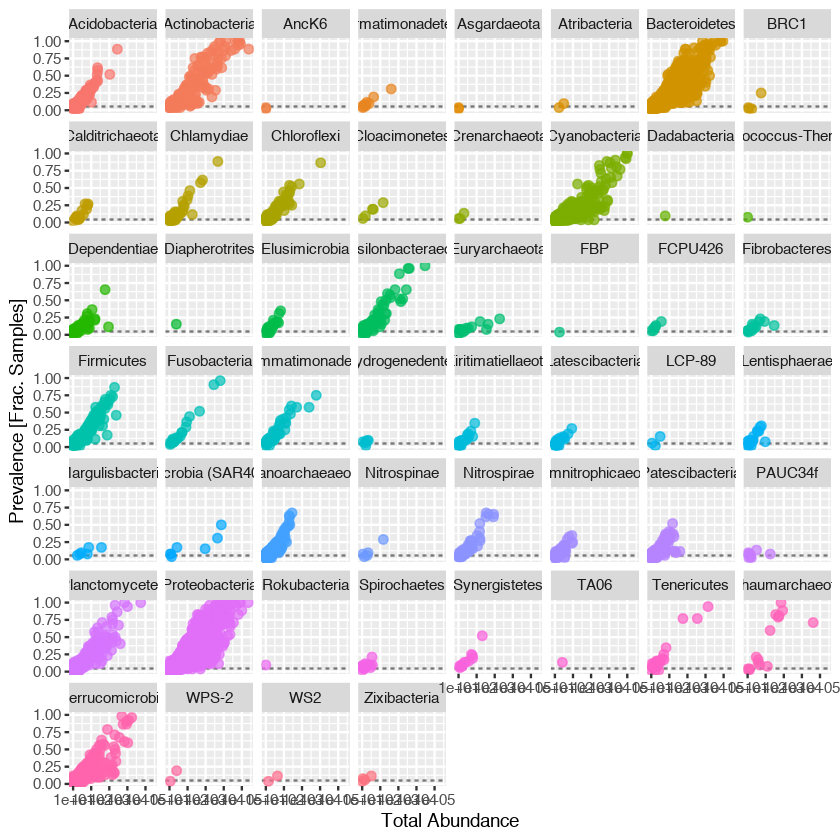

In [28]:

# explore the relationship of prevalence and total read count for each feature
p <- ggplot(prevdf, aes(TotalAbundance, Prevalence / nsamples(ps),color=Phylum)) +
  # Include a guess for parameter
  geom_hline(yintercept = 0.05, alpha = 0.5, linetype = 2) +  geom_point(size = 2, alpha = 0.7) +
  scale_x_log10() +  xlab("Total Abundance") + ylab("Prevalence [Frac. Samples]") +
  facet_wrap(~Phylum) + theme(legend.position="none")
p
# ggsave("Figures/Prevalence_by_phylum.pdf",plot = p, dpi = 300, width = 12, height = 12, units = c("in"))


In [29]:

# Abundance value transformation
# Skip ahead in tutorial
# This is for transforming abundance data to account for library size differences

# First, define plot_abundance(), which  uses phyloseq’s function to define a relative abundance graphic
plot_abundance = function(physeq,title = "",
                          Facet = "Order", Color = "Phylum"){
  # This is an arbitrary subset, based on the Phylum Firmicutes, for plotting
  # (when doing this for Proteobacteria it takes a very long time)
  p1f = subset_taxa(physeq, Phylum %in% c("Firmicutes"))
  mphyseq = psmelt(p1f)
  mphyseq <- subset(mphyseq, Abundance > 0)
  ggplot(data = mphyseq, mapping = aes_string(x = "Size_fraction",y = "Abundance",
                                              color = Color, fill = Color)) +
    geom_violin(fill = NA) +
    geom_point(size = 1, alpha = 0.3,
               position = position_jitter(width = 0.3)) +
    facet_wrap(facets = Facet) + scale_y_log10()+
    theme(legend.position="none")
}

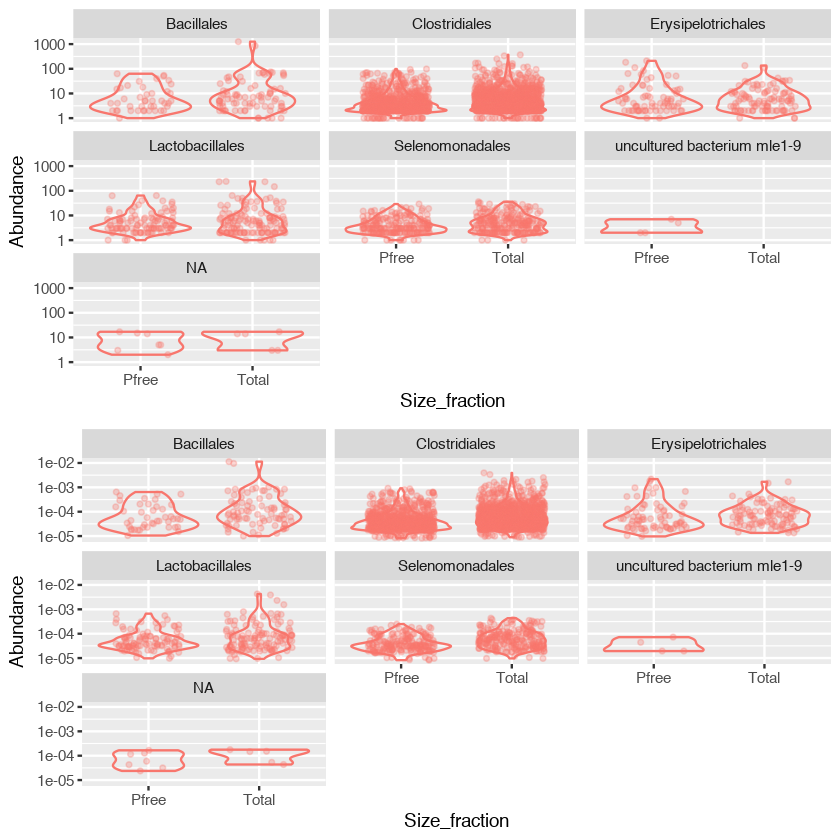

In [30]:
# Transform phyloseq object's otu counts to relative abundance. Save as new object.
ps_ra = transform_sample_counts(ps, function(x){x / sum(x)})

# Now we plot the abundance values before and after transformation.
plotBefore = plot_abundance(ps,"")
plotAfter = plot_abundance(ps_ra,"")
# Combine each plot into one graphic.
grid.arrange(nrow = 2,  plotBefore, plotAfter)


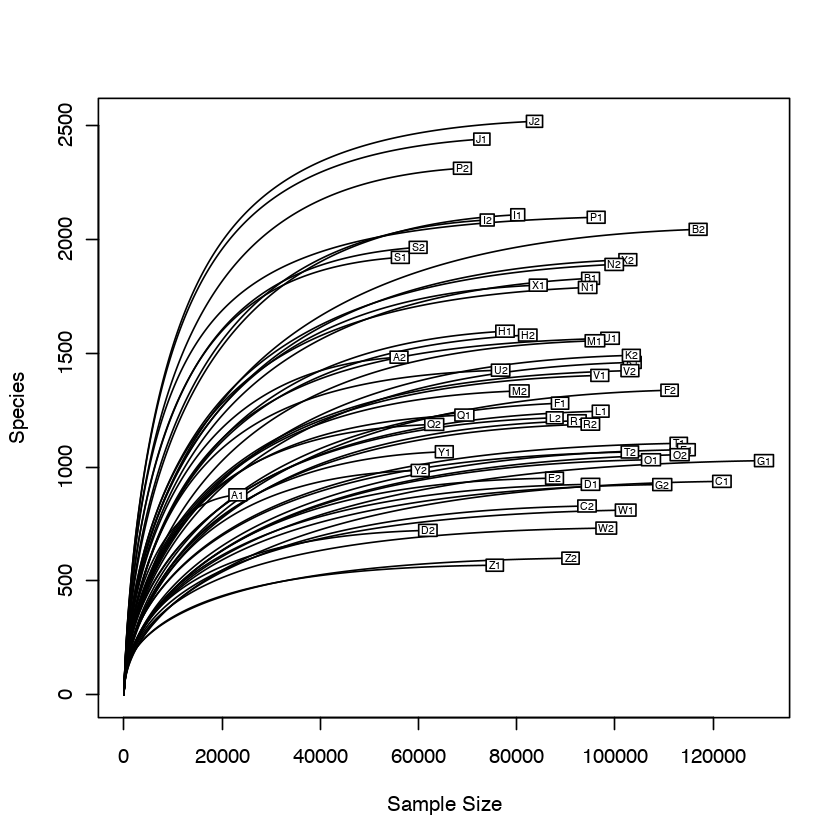

In [31]:
# A more comprehensive way to do this is probably to check the rarefaction plots.
# Following this tutorial, https://micca.readthedocs.io/en/latest/phyloseq.html, 
# which recomends using the function from vegan

rarecurve(t(otu_table(ps)), step=50, cex=0.5)


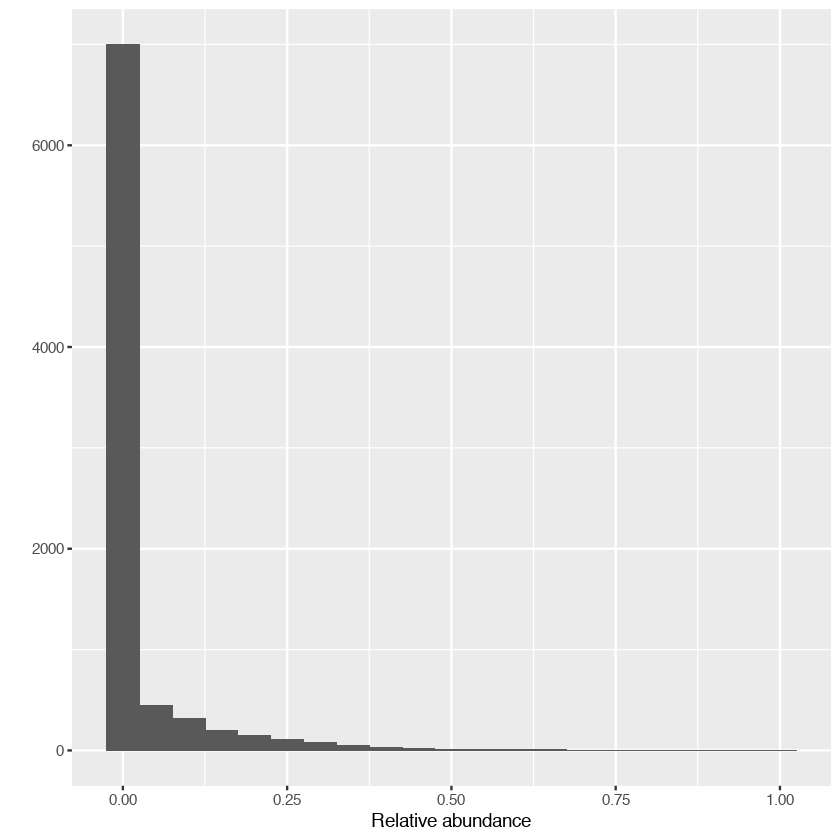

In [41]:
# Check abundance  of all ASVs across samples to make sure there are no outliers in terms of low abundance samples
rel_abund <- t(apply(otu_table(ps), 1, function(x) x / sum(x)))
qplot(rel_abund[, 12], geom = "histogram",binwidth=0.05) +
  xlab("Relative abundance")
# distribution looks good


In [42]:
############## Ordinations ##############
# Try different ordinations to see which explains most variability


In [ ]:

# First need to transform to reduce influence of zeroes using Hellinger transformation
# (= sqrt of rel abun)
ps_ra = transform_sample_counts(ps, function(x){(x)/sum(x)})
ps_hellinger <- transform_sample_counts(ps_ra, function(x){sqrt(x)})


In [33]:
# check
head(otu_table(ps), 25)
head(otu_table(ps_ra), 25)
head(otu_table(ps_hellinger), 25)


,C1,W2,C2,S1,A1,K1,G2,I2,A2,Q2,⋯,B1,L2,P1,J2,N1,H1,F1,R2,O1,M2
69c52d9549009586775623d3a0bbcbef,3,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
cb0463084f6ed509d3df1aa0f7a2e115,11,11,0,0,0,0,0,0,0,0,⋯,6,2,8,0,0,0,4,0,0,0
19aa0369c5add3d1191215eab2c947d1,0,4,0,0,0,0,0,0,0,0,⋯,10,0,14,4,0,0,9,0,0,0
8afc45a9fbcbc4a33f477e547c1932a9,0,0,3,0,0,0,0,0,0,0,⋯,6,0,0,0,2,0,0,0,0,0
66205bbaeafdd1531c8288d2f8735fde,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
92b51c82f97e6e8ee00ccd1b90552312,0,0,0,0,0,0,0,2,0,0,⋯,2,0,0,6,0,0,0,0,0,0
eaa86fa9732292b17837ffbd4237f606,0,0,0,32,0,0,0,0,0,0,⋯,0,0,0,24,78,0,0,0,0,0
32aa84d6638e5f227af3fa99657389d8,0,0,0,6,0,0,0,8,0,0,⋯,5,0,11,0,8,0,0,0,0,0
3eaa9ff566ad80c0f77d4e849897ef10,0,0,0,0,0,0,0,2,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ef701d5160404f00672c51d5f15bdac7,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


,C1,W2,C2,S1,A1,K1,G2,I2,A2,Q2,⋯,B1,L2,P1,J2,N1,H1,F1,R2,O1,M2
69c52d9549009586775623d3a0bbcbef,2.463317e-05,0.000000e+00,0.000000e+00,0.0000000000,0,0.000000e+00,0,0.000000e+00,0.000000e+00,0,⋯,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0.000000e+00,0,0,0
cb0463084f6ed509d3df1aa0f7a2e115,9.032163e-05,1.119798e-04,0.000000e+00,0.0000000000,0,0.000000e+00,0,0.000000e+00,0.000000e+00,0,⋯,6.313331e-05,2.279696e-05,8.318256e-05,0.000000e+00,0.000000e+00,0,4.503592e-05,0,0,0
19aa0369c5add3d1191215eab2c947d1,0.000000e+00,4.071993e-05,0.000000e+00,0.0000000000,0,0.000000e+00,0,0.000000e+00,0.000000e+00,0,⋯,1.052222e-04,0.000000e+00,1.455695e-04,4.783716e-05,0.000000e+00,0,1.013308e-04,0,0,0
8afc45a9fbcbc4a33f477e547c1932a9,0.000000e+00,0.000000e+00,3.180999e-05,0.0000000000,0,0.000000e+00,0,0.000000e+00,0.000000e+00,0,⋯,6.313331e-05,0.000000e+00,0.000000e+00,0.000000e+00,2.117769e-05,0,0.000000e+00,0,0,0
66205bbaeafdd1531c8288d2f8735fde,0.000000e+00,0.000000e+00,0.000000e+00,0.0000000000,0,0.000000e+00,0,0.000000e+00,0.000000e+00,0,⋯,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0.000000e+00,0,0,0
92b51c82f97e6e8ee00ccd1b90552312,0.000000e+00,0.000000e+00,0.000000e+00,0.0000000000,0,0.000000e+00,0,2.703397e-05,0.000000e+00,0,⋯,2.104444e-05,0.000000e+00,0.000000e+00,7.175574e-05,0.000000e+00,0,0.000000e+00,0,0,0
eaa86fa9732292b17837ffbd4237f606,0.000000e+00,0.000000e+00,0.000000e+00,0.0005685452,0,0.000000e+00,0,0.000000e+00,0.000000e+00,0,⋯,0.000000e+00,0.000000e+00,0.000000e+00,2.870230e-04,8.259300e-04,0,0.000000e+00,0,0,0
32aa84d6638e5f227af3fa99657389d8,0.000000e+00,0.000000e+00,0.000000e+00,0.0001066022,0,0.000000e+00,0,1.081359e-04,0.000000e+00,0,⋯,5.261109e-05,0.000000e+00,1.143760e-04,0.000000e+00,8.471077e-05,0,0.000000e+00,0,0,0
3eaa9ff566ad80c0f77d4e849897ef10,0.000000e+00,0.000000e+00,0.000000e+00,0.0000000000,0,0.000000e+00,0,2.703397e-05,0.000000e+00,0,⋯,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0.000000e+00,0,0,0
ef701d5160404f00672c51d5f15bdac7,0.000000e+00,0.000000e+00,0.000000e+00,0.0000000000,0,0.000000e+00,0,0.000000e+00,0.000000e+00,0,⋯,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0.000000e+00,0,0,0


,C1,W2,C2,S1,A1,K1,G2,I2,A2,Q2,⋯,B1,L2,P1,J2,N1,H1,F1,R2,O1,M2
69c52d9549009586775623d3a0bbcbef,0.004963182,0.000000000,0.000000000,0.00000000,0,0.000000000,0,0.000000000,0.000000000,0,⋯,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0,0.00000000,0,0,0
cb0463084f6ed509d3df1aa0f7a2e115,0.009503769,0.010582051,0.000000000,0.00000000,0,0.000000000,0,0.000000000,0.000000000,0,⋯,0.007945647,0.004774616,0.009120448,0.000000000,0.000000000,0,0.00671088,0,0,0
19aa0369c5add3d1191215eab2c947d1,0.000000000,0.006381217,0.000000000,0.00000000,0,0.000000000,0,0.000000000,0.000000000,0,⋯,0.010257786,0.000000000,0.012065218,0.006916441,0.000000000,0,0.01006632,0,0,0
8afc45a9fbcbc4a33f477e547c1932a9,0.000000000,0.000000000,0.005640034,0.00000000,0,0.000000000,0,0.000000000,0.000000000,0,⋯,0.007945647,0.000000000,0.000000000,0.000000000,0.004601923,0,0.00000000,0,0,0
66205bbaeafdd1531c8288d2f8735fde,0.000000000,0.000000000,0.000000000,0.00000000,0,0.000000000,0,0.000000000,0.000000000,0,⋯,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0,0.00000000,0,0,0
92b51c82f97e6e8ee00ccd1b90552312,0.000000000,0.000000000,0.000000000,0.00000000,0,0.000000000,0,0.005199420,0.000000000,0,⋯,0.004587421,0.000000000,0.000000000,0.008470876,0.000000000,0,0.00000000,0,0,0
eaa86fa9732292b17837ffbd4237f606,0.000000000,0.000000000,0.000000000,0.02384419,0,0.000000000,0,0.000000000,0.000000000,0,⋯,0.000000000,0.000000000,0.000000000,0.016941752,0.028738997,0,0.00000000,0,0,0
32aa84d6638e5f227af3fa99657389d8,0.000000000,0.000000000,0.000000000,0.01032484,0,0.000000000,0,0.010398840,0.000000000,0,⋯,0.007253350,0.000000000,0.010694673,0.000000000,0.009203845,0,0.00000000,0,0,0
3eaa9ff566ad80c0f77d4e849897ef10,0.000000000,0.000000000,0.000000000,0.00000000,0,0.000000000,0,0.005199420,0.000000000,0,⋯,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0,0.00000000,0,0,0
ef701d5160404f00672c51d5f15bdac7,0.000000000,0.000000000,0.000000000,0.00000000,0,0.000000000,0,0.000000000,0.000000000,0,⋯,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0,0.00000000,0,0,0


In [34]:
# PCoA (MDS)
out.pcoa.log <- ordinate(ps_hellinger, method = "MDS", distance = "bray")
evals <- out.pcoa.log$values$Eigenvalues
pcoa_plot = plot_ordination(ps_hellinger, out.pcoa.log, shape="Size_fraction") +
  geom_point(size = 3) +
  geom_text(mapping = aes(label = YYYYMMDD), size = 2)
            #, position = position_jitter(width = .05, height = .03))


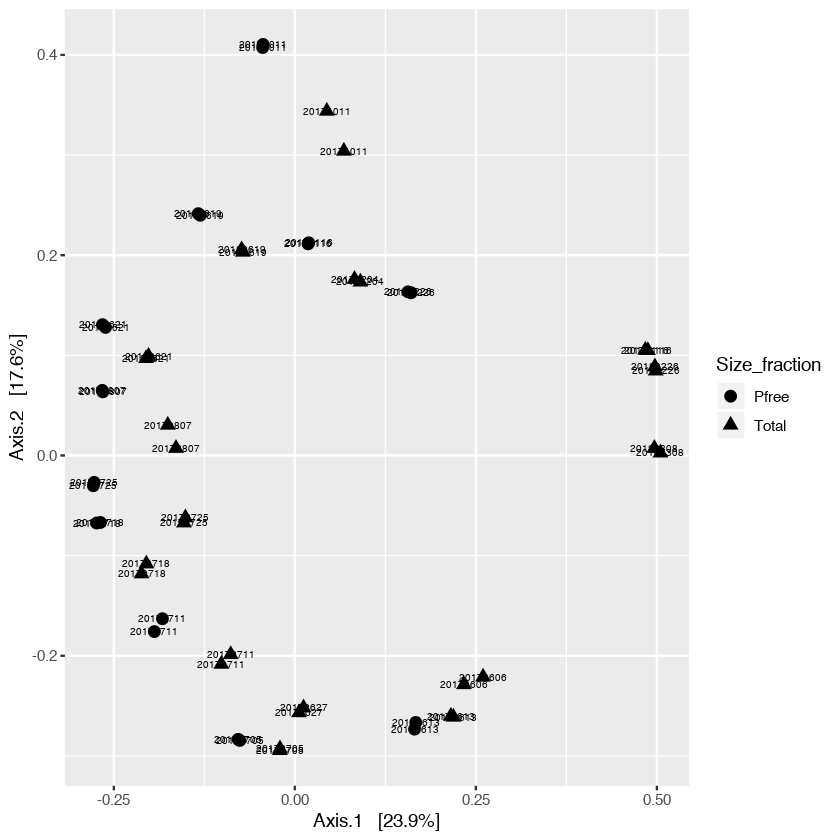

In [35]:
pcoa_plot

In [36]:
# PcOA using weighted unifrac
out.wuf.log <- ordinate(ps_hellinger, method = "MDS", distance = "wunifrac")
evals <- out.wuf.log$values$Eigenvalues
wuf_plot = plot_ordination(ps_hellinger, out.wuf.log, shape="Size_fraction") +
  geom_point(size = 3) +
  geom_text(mapping = aes(label = YYYYMMDD), size = 2)
            #, position = position_jitter(width = .01, height = .01))


Warning message in matrix(tree$edge[order(tree$edge[, 1]), ][, 2], byrow = TRUE, :
“data length [16843] is not a sub-multiple or multiple of the number of rows [8422]”


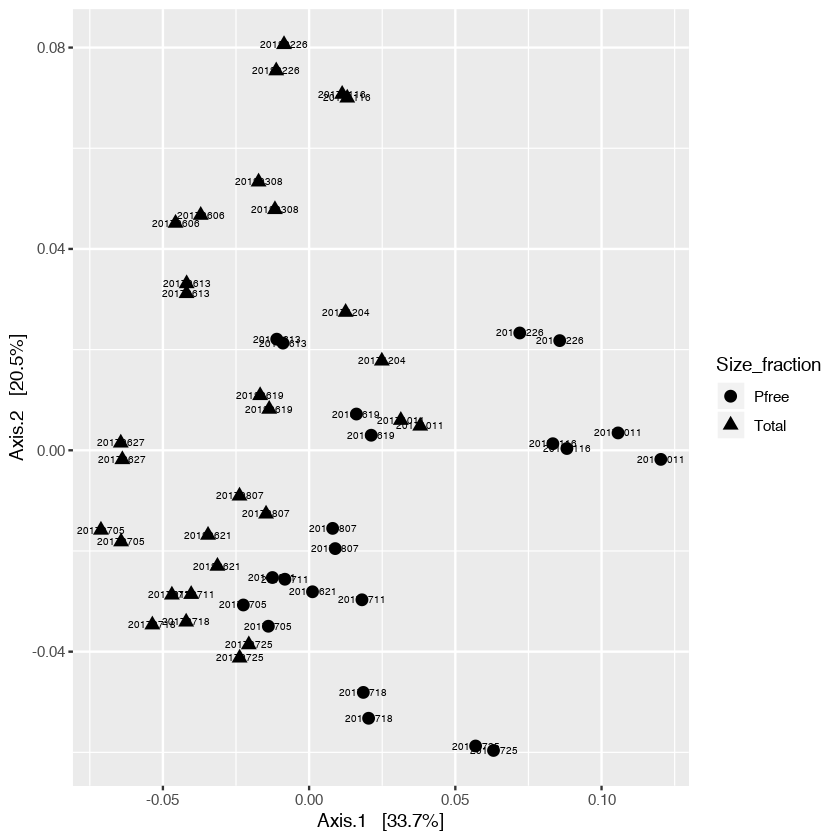

In [37]:
wuf_plot

In [38]:
# nMDS using weighted unifrac
out.nmds.log <- ordinate(ps_hellinger, method = "NMDS", distance = "wunifrac")
evals <- out.nmds.log$values$Eigenvalues
nmds_plot = plot_ordination(ps_hellinger, out.nmds.log, shape="Size_fraction") +
  geom_point(size = 3) +
  geom_text(mapping = aes(label = YYYYMMDD), size = 2)


Warning message in matrix(tree$edge[order(tree$edge[, 1]), ][, 2], byrow = TRUE, :
“data length [16843] is not a sub-multiple or multiple of the number of rows [8422]”


Run 0 stress 0.1293575 
Run 1 stress 0.1293575 
... Procrustes: rmse 5.349737e-05  max resid 0.0002338908 
... Similar to previous best
Run 2 stress 0.1293575 
... Procrustes: rmse 4.112533e-05  max resid 0.0002195773 
... Similar to previous best
Run 3 stress 0.1293574 
... New best solution
... Procrustes: rmse 1.71503e-05  max resid 7.491448e-05 
... Similar to previous best
Run 4 stress 0.1293574 
... New best solution
... Procrustes: rmse 1.559546e-05  max resid 9.631842e-05 
... Similar to previous best
Run 5 stress 0.1293575 
... Procrustes: rmse 4.056062e-05  max resid 0.0001898459 
... Similar to previous best
Run 6 stress 0.1293574 
... New best solution
... Procrustes: rmse 1.62942e-05  max resid 7.746537e-05 
... Similar to previous best
Run 7 stress 0.1293576 
... Procrustes: rmse 0.0001002069  max resid 0.0004636293 
... Similar to previous best
Run 8 stress 0.2246533 
Run 9 stress 0.2210332 
Run 10 stress 0.1293575 
... Procrustes: rmse 6.713334e-05  max resid 0.00034602

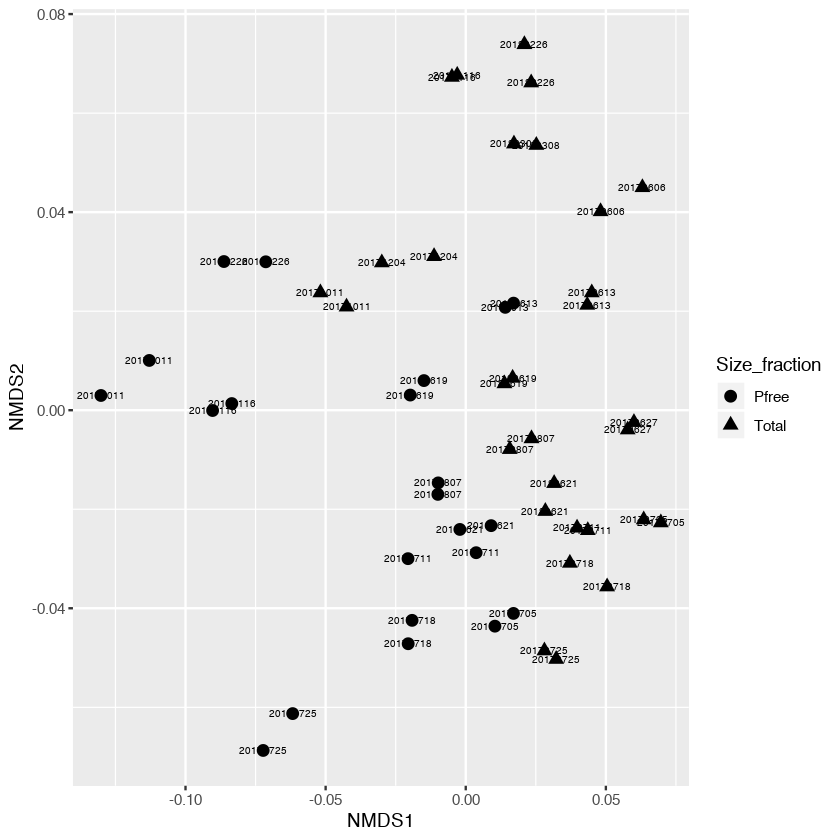

In [39]:
nmds_plot

In [40]:
# I am going to continue with the weighted 
# unifrac PCoA. Shows strongest axes (>60% in 
# 1st two axes)


In [43]:
# Plot environmental variables on PCoA


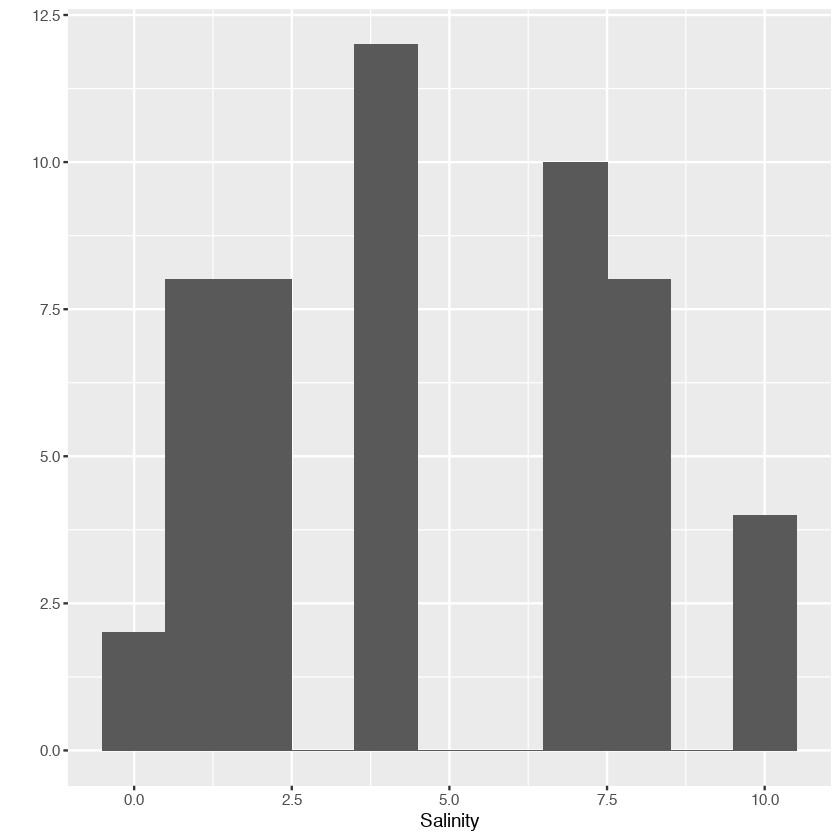

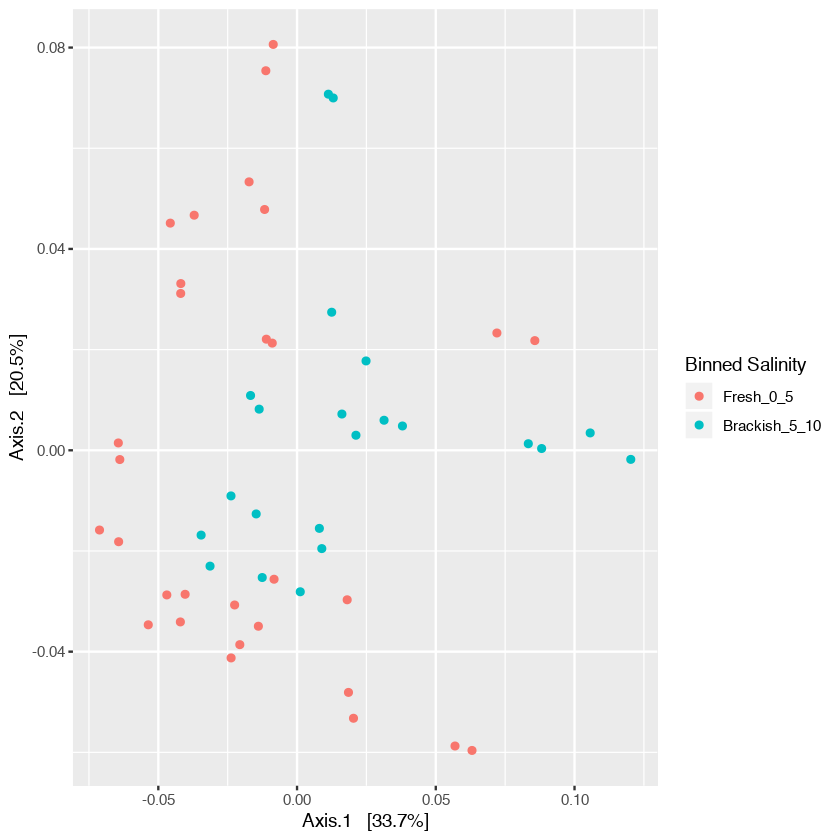

In [44]:
# First Salinity- 2 ways of doing this

# See distribution frequency of salinity values
qplot(sample_data(ps_hellinger)$Salinity, geom = "histogram",binwidth=1) + xlab("Salinity")

# 1st option- Divide into two binds for plotting
sample_data(ps_hellinger)$salinity_binned <- cut(sample_data(ps_hellinger)$Salinity, breaks = c(0, 5, 10))
levels(sample_data(ps_hellinger)$salinity_binned) <- list(Fresh_0_5="(0,5]", Brackish_5_10="(5,10]")

plot_ordination(ps_hellinger, out.wuf.log, color = "salinity_binned") +
  labs(col = "Binned Salinity")


In [45]:
# 2nd option= plot as continuous scale bar. This is probably more fair
wuf_sal_plot <- plot_ordination(ps_hellinger, out.wuf.log, color = "Salinity") +
  geom_point(size = 4) +
  labs(col = "Salinity") +
  scale_color_viridis(option="magma") 


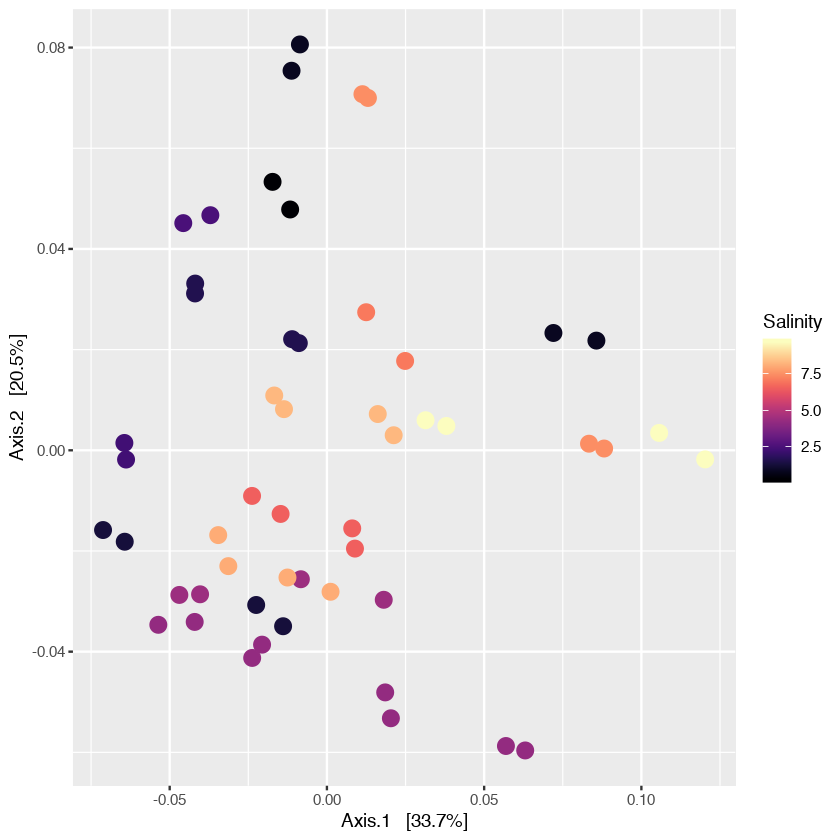

In [46]:
wuf_sal_plot

In [47]:
# Temperature
wuf_temp_plot <- plot_ordination(ps_hellinger, out.wuf.log, color = "Temperature") +
  geom_point(size = 4) +
  labs(col = "Temp (C)") +
  scale_color_viridis(option="magma") 


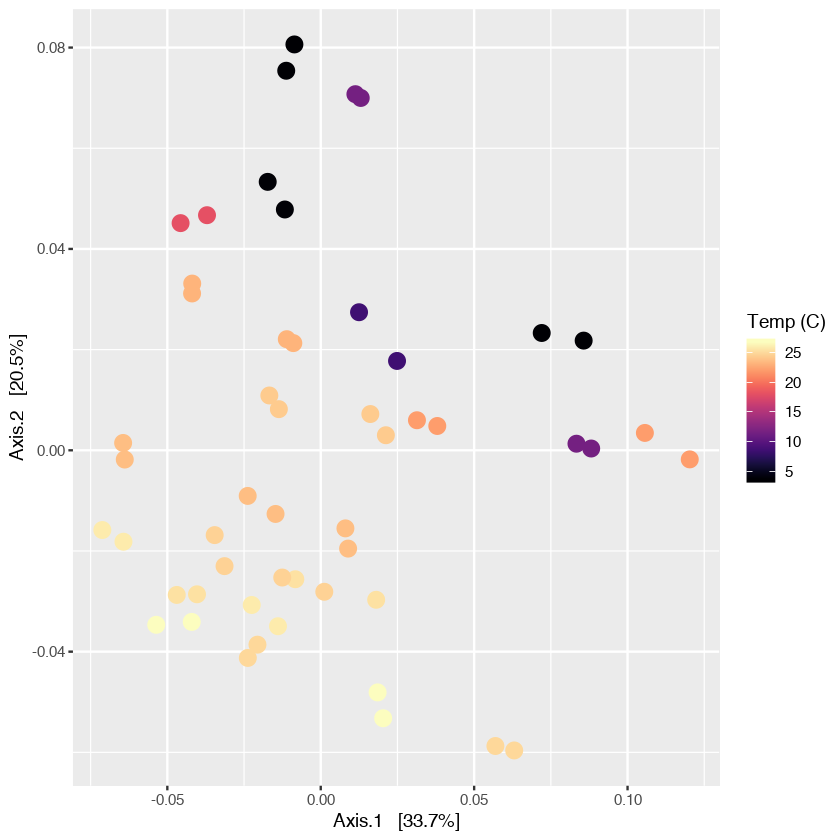

In [48]:
wuf_temp_plot

In [49]:
# Secchi Depth
wuf_secchi_plot <- plot_ordination(ps_hellinger, out.wuf.log, color = "SecchiDepth") +
  geom_point(size = 4) +
  labs(col = "Secchi Dep (m)") +
  scale_color_viridis(option="magma") 


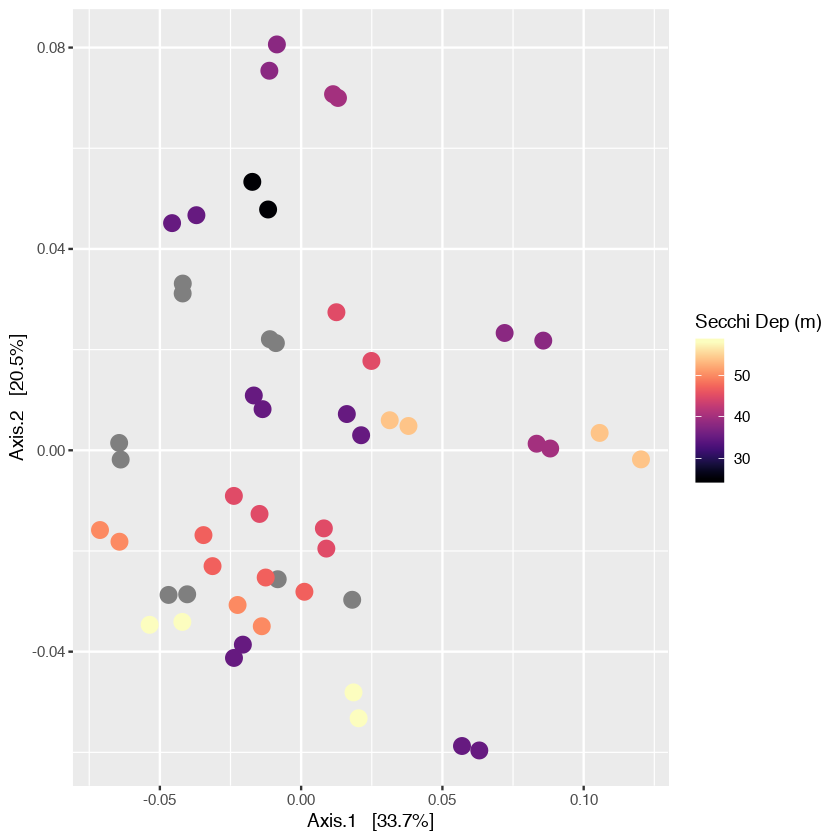

In [50]:
wuf_secchi_plot

In [51]:
# O2_mgL
wuf_O2_plot <- plot_ordination(ps_hellinger, out.wuf.log, color = "O2_mgL") +
  geom_point(size = 4) +
  labs(col = "O2 (mg/L)") +
  scale_color_viridis(option="magma") 


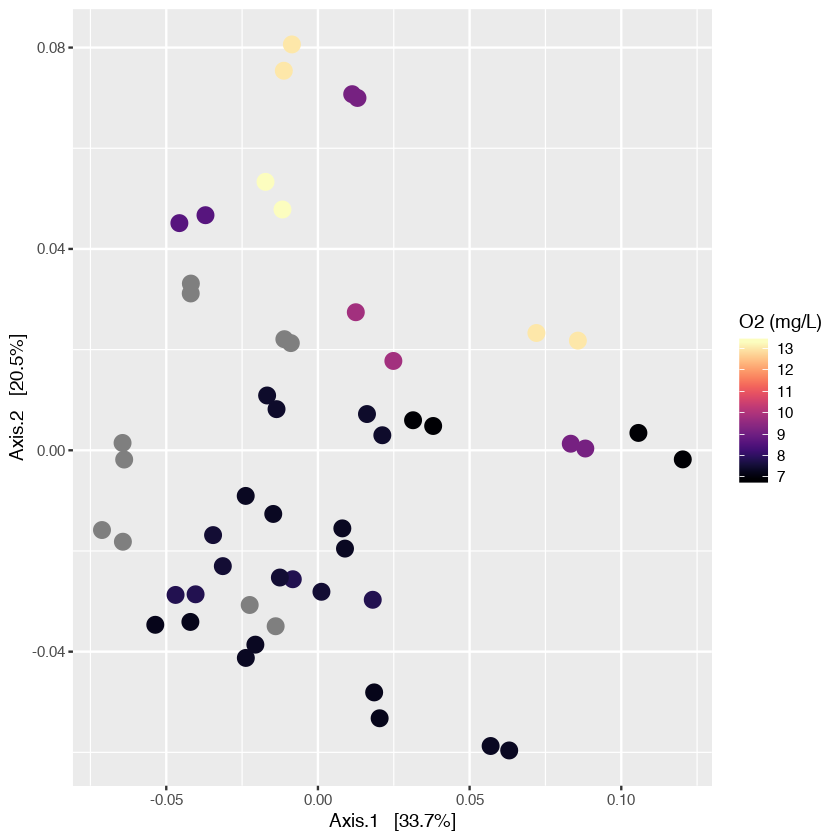

In [52]:
wuf_O2_plot

In [53]:
# Volume filtered- see if this has an effect
wuf_volfilt_plot <- plot_ordination(ps_hellinger, out.wuf.log, color = "Vol_Filtered") +
  geom_point(size = 4) +
  labs(col = "Vol.Filtered(ml)") +
  scale_color_viridis(option="magma") 


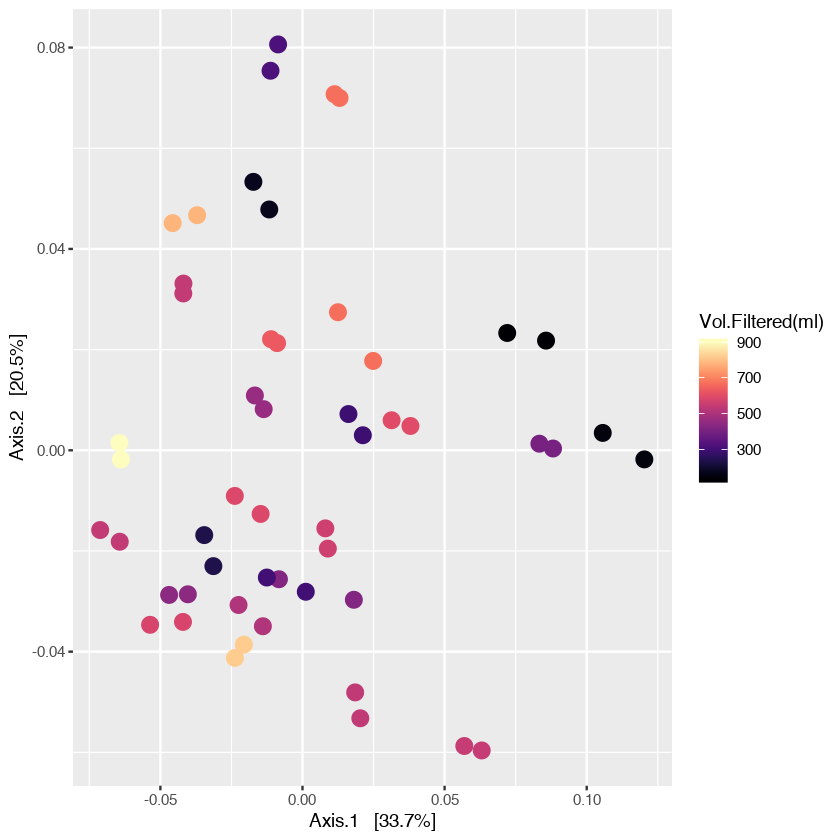

In [54]:
wuf_volfilt_plot

In [55]:
# Location
wuf_location_plot <- plot_ordination(ps_hellinger, out.wuf.log, color = "Location") +
  labs(col = "Location") +
  geom_point(size = 4)


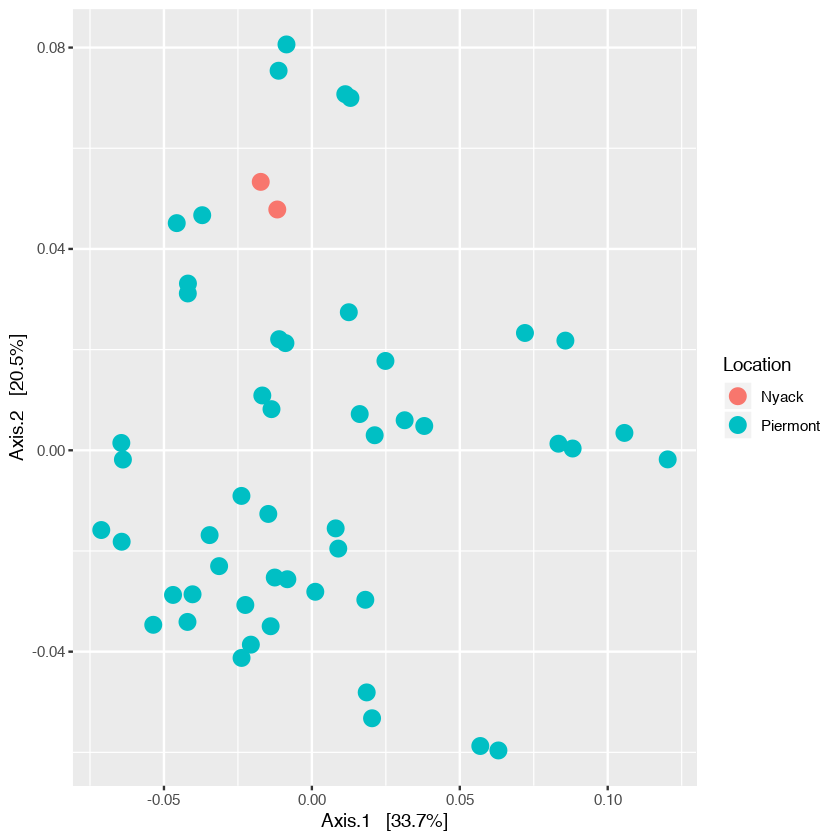

In [56]:
wuf_location_plot

In [57]:
#Time of day
wuf_time_plot <- plot_ordination(ps_hellinger, out.wuf.log, color = "Time") +
  labs(col = "Time of Day") +
  geom_point(size = 4)


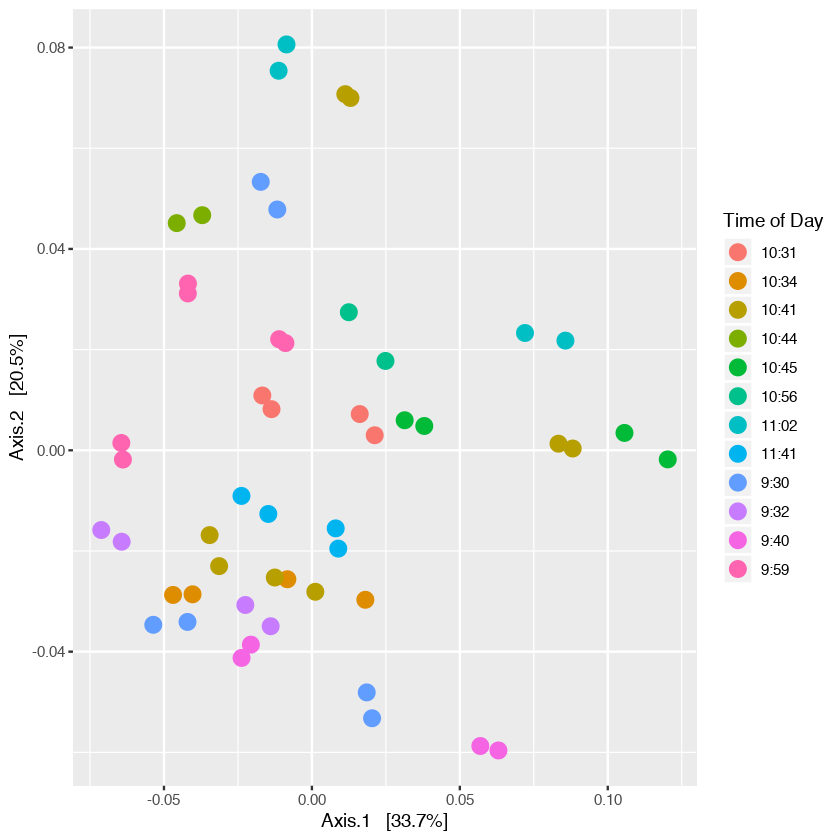

In [58]:
wuf_time_plot

In [59]:
# Tide
wuf_tide_plot <- plot_ordination(ps_hellinger, out.wuf.log, color = "Tide") +
  labs(col = "Tide") +
  geom_point(size = 4)


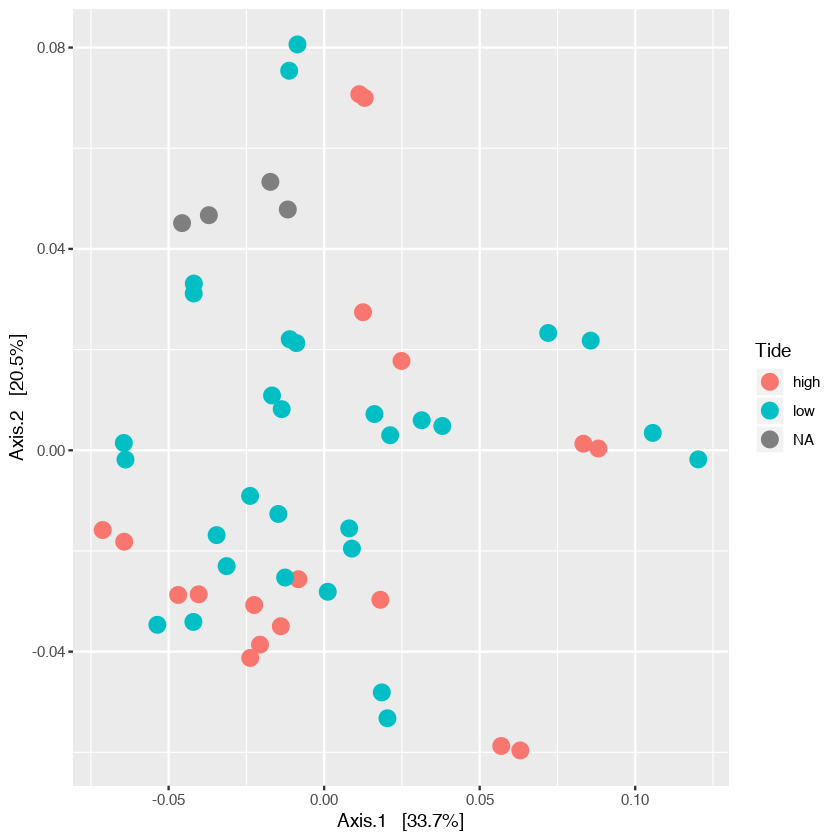

In [60]:
wuf_tide_plot

In [61]:
#Rain
wuf_rain_plot <- plot_ordination(ps_hellinger, out.wuf.log, color = "Rain_3d_prior") +
  labs(col = "Rain 3d Prior?") +
  geom_point(size = 4)


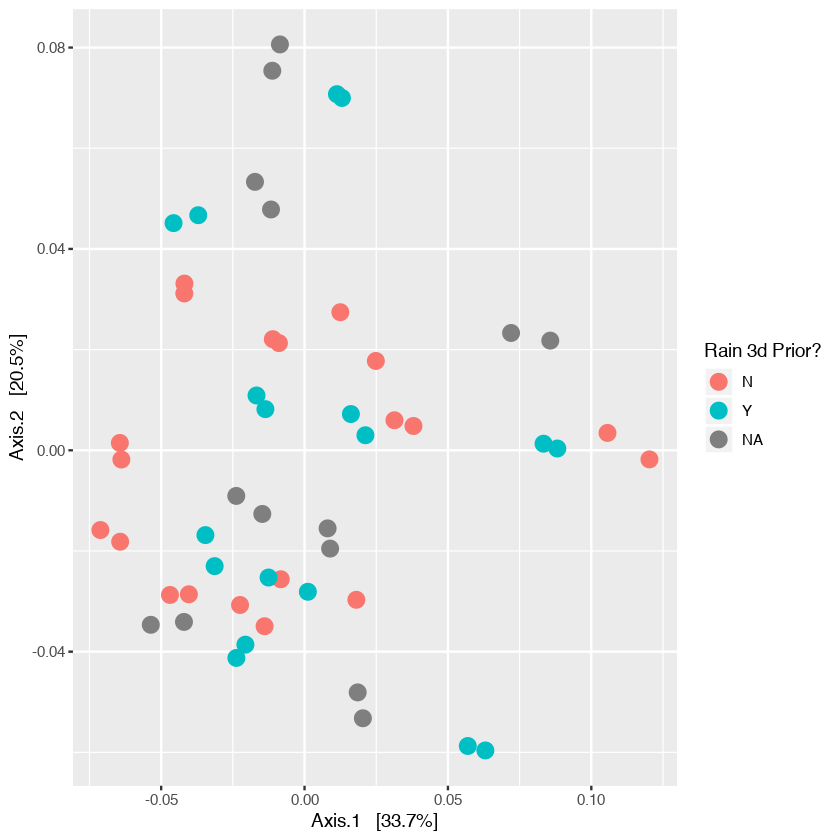

In [62]:
wuf_rain_plot

In [63]:
#Size fraction
wuf_size_fraction_plot <- plot_ordination(ps_hellinger, out.wuf.log, color = "Size_fraction") +
  labs(col = "Size Fraction") +
  geom_point(size = 4)


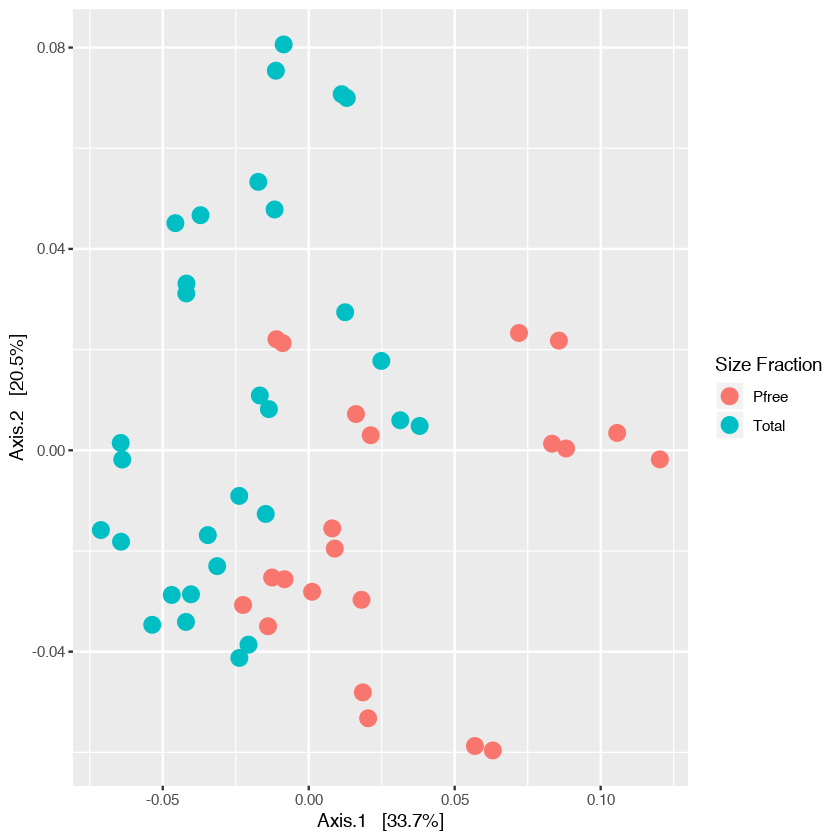

In [64]:
wuf_size_fraction_plot

In [65]:
# Differential Abundance

In [66]:
library("DESeq2")

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loading required package: SummarizedExperiment

Loading required package: Biobase

Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.



Attaching package: ‘Biobase’


The following object is masked from ‘package:phyloseq’:

    sampleNames


Loading required package: DelayedArray

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following objects are masked from ‘package:Biobase’:

    anyMissing, rowMedians


The following object is masked from ‘package:dplyr’:

    count


Loading required package: BiocParallel


Attaching package: ‘DelayedArray’


The following objects are masked from ‘package:matrixStats’:

    colMaxs, colMins, colRanges, rowMaxs, rowMins, rowRanges


The following object is masked from ‘package:purrr’:

    s

In [67]:
# Convert to deseq
ps_ra_1000000 <- transform_sample_counts(ps_ra, function(x){x*1000000})
# check
head(otu_table(ps_ra), 25)
head(otu_table(ps_ra_1000000), 25)


,C1,W2,C2,S1,A1,K1,G2,I2,A2,Q2,⋯,B1,L2,P1,J2,N1,H1,F1,R2,O1,M2
69c52d9549009586775623d3a0bbcbef,2.463317e-05,0.000000e+00,0.000000e+00,0.0000000000,0,0.000000e+00,0,0.000000e+00,0.000000e+00,0,⋯,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0.000000e+00,0,0,0
cb0463084f6ed509d3df1aa0f7a2e115,9.032163e-05,1.119798e-04,0.000000e+00,0.0000000000,0,0.000000e+00,0,0.000000e+00,0.000000e+00,0,⋯,6.313331e-05,2.279696e-05,8.318256e-05,0.000000e+00,0.000000e+00,0,4.503592e-05,0,0,0
19aa0369c5add3d1191215eab2c947d1,0.000000e+00,4.071993e-05,0.000000e+00,0.0000000000,0,0.000000e+00,0,0.000000e+00,0.000000e+00,0,⋯,1.052222e-04,0.000000e+00,1.455695e-04,4.783716e-05,0.000000e+00,0,1.013308e-04,0,0,0
8afc45a9fbcbc4a33f477e547c1932a9,0.000000e+00,0.000000e+00,3.180999e-05,0.0000000000,0,0.000000e+00,0,0.000000e+00,0.000000e+00,0,⋯,6.313331e-05,0.000000e+00,0.000000e+00,0.000000e+00,2.117769e-05,0,0.000000e+00,0,0,0
66205bbaeafdd1531c8288d2f8735fde,0.000000e+00,0.000000e+00,0.000000e+00,0.0000000000,0,0.000000e+00,0,0.000000e+00,0.000000e+00,0,⋯,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0.000000e+00,0,0,0
92b51c82f97e6e8ee00ccd1b90552312,0.000000e+00,0.000000e+00,0.000000e+00,0.0000000000,0,0.000000e+00,0,2.703397e-05,0.000000e+00,0,⋯,2.104444e-05,0.000000e+00,0.000000e+00,7.175574e-05,0.000000e+00,0,0.000000e+00,0,0,0
eaa86fa9732292b17837ffbd4237f606,0.000000e+00,0.000000e+00,0.000000e+00,0.0005685452,0,0.000000e+00,0,0.000000e+00,0.000000e+00,0,⋯,0.000000e+00,0.000000e+00,0.000000e+00,2.870230e-04,8.259300e-04,0,0.000000e+00,0,0,0
32aa84d6638e5f227af3fa99657389d8,0.000000e+00,0.000000e+00,0.000000e+00,0.0001066022,0,0.000000e+00,0,1.081359e-04,0.000000e+00,0,⋯,5.261109e-05,0.000000e+00,1.143760e-04,0.000000e+00,8.471077e-05,0,0.000000e+00,0,0,0
3eaa9ff566ad80c0f77d4e849897ef10,0.000000e+00,0.000000e+00,0.000000e+00,0.0000000000,0,0.000000e+00,0,2.703397e-05,0.000000e+00,0,⋯,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0.000000e+00,0,0,0
ef701d5160404f00672c51d5f15bdac7,0.000000e+00,0.000000e+00,0.000000e+00,0.0000000000,0,0.000000e+00,0,0.000000e+00,0.000000e+00,0,⋯,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0.000000e+00,0,0,0


,C1,W2,C2,S1,A1,K1,G2,I2,A2,Q2,⋯,B1,L2,P1,J2,N1,H1,F1,R2,O1,M2
69c52d9549009586775623d3a0bbcbef,24.63317,0.00000,0.00000,0.0000,0,0.00000,0,0.00000,0.00000,0,⋯,0.00000,0.00000,0.00000,0.00000,0.00000,0,0.00000,0,0,0
cb0463084f6ed509d3df1aa0f7a2e115,90.32163,111.97980,0.00000,0.0000,0,0.00000,0,0.00000,0.00000,0,⋯,63.13331,22.79696,83.18256,0.00000,0.00000,0,45.03592,0,0,0
19aa0369c5add3d1191215eab2c947d1,0.00000,40.71993,0.00000,0.0000,0,0.00000,0,0.00000,0.00000,0,⋯,105.22218,0.00000,145.56949,47.83716,0.00000,0,101.33081,0,0,0
8afc45a9fbcbc4a33f477e547c1932a9,0.00000,0.00000,31.80999,0.0000,0,0.00000,0,0.00000,0.00000,0,⋯,63.13331,0.00000,0.00000,0.00000,21.17769,0,0.00000,0,0,0
66205bbaeafdd1531c8288d2f8735fde,0.00000,0.00000,0.00000,0.0000,0,0.00000,0,0.00000,0.00000,0,⋯,0.00000,0.00000,0.00000,0.00000,0.00000,0,0.00000,0,0,0
92b51c82f97e6e8ee00ccd1b90552312,0.00000,0.00000,0.00000,0.0000,0,0.00000,0,27.03397,0.00000,0,⋯,21.04444,0.00000,0.00000,71.75574,0.00000,0,0.00000,0,0,0
eaa86fa9732292b17837ffbd4237f606,0.00000,0.00000,0.00000,568.5452,0,0.00000,0,0.00000,0.00000,0,⋯,0.00000,0.00000,0.00000,287.02297,825.92997,0,0.00000,0,0,0
32aa84d6638e5f227af3fa99657389d8,0.00000,0.00000,0.00000,106.6022,0,0.00000,0,108.13587,0.00000,0,⋯,52.61109,0.00000,114.37603,0.00000,84.71077,0,0.00000,0,0,0
3eaa9ff566ad80c0f77d4e849897ef10,0.00000,0.00000,0.00000,0.0000,0,0.00000,0,27.03397,0.00000,0,⋯,0.00000,0.00000,0.00000,0.00000,0.00000,0,0.00000,0,0,0
ef701d5160404f00672c51d5f15bdac7,0.00000,0.00000,0.00000,0.0000,0,0.00000,0,0.00000,0.00000,0,⋯,0.00000,0.00000,0.00000,0.00000,0.00000,0,0.00000,0,0,0


In [68]:
#convert to deseq- using size fraction as the comparison variable
Size_fraction_dds = phyloseq_to_deseq2(ps_ra_1000000, ~Size_fraction)
Size_fraction_dds = DESeq(Size_fraction_dds, test="Wald", fitType="parametric")


converting counts to integer mode

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 5927 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [69]:
# Investigate results table
res = results(Size_fraction_dds, cooksCutoff = FALSE)


In [70]:
# Filter out those taxa with pvals<0.01
alpha = 0.01
sigtab = res[which(res$padj < alpha), ]
sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(ps)[rownames(sigtab), ], "matrix"))
head(sigtab)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Kingdom,Phylum,Class,Order,Family,Genus,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
eaa86fa9732292b17837ffbd4237f606,587.10634,29.062435,2.9506846,9.849387,6.896322e-23,2.956344e-21,Bacteria,Patescibacteria,Saccharimonadia,Saccharimonadales,NA,NA,NA
c029f279659b7f75ef408bc133ce7be9,96.11269,10.496338,2.8222365,3.719156,1.998895e-04,1.423994e-03,Bacteria,Patescibacteria,Gracilibacteria,metagenome,metagenome,metagenome,metagenome
b6eec0906e7a9df917fa9c16ba6dc87c,546.20913,3.263489,0.6213394,5.252346,1.501744e-07,1.825627e-06,Archaea,Thaumarchaeota,Nitrososphaeria,Nitrosopumilales,Nitrosopumilaceae,Candidatus Nitrosoarchaeum,uncultured archaeon
02ff651d9209f046f493867a7d14cca6,255.24104,4.081609,0.8075571,5.054267,4.320466e-07,4.910260e-06,Archaea,Thaumarchaeota,Nitrososphaeria,Nitrosopumilales,Nitrosopumilaceae,Candidatus Nitrosopumilus,NA
a6b27d7ed3ac49bcabea338cfefaaec0,102.73236,26.624552,2.9525549,9.017462,1.924969e-19,4.315286e-18,Bacteria,Patescibacteria,Parcubacteria,Candidatus Moranbacteria,uncultured bacterium,uncultured bacterium,uncultured bacterium
59b15a0d55b0b19085c945ff7eb24b63,147.12541,27.087398,2.9524903,9.174424,4.539951e-20,1.109337e-18,Bacteria,Patescibacteria,Parcubacteria,Candidatus Moranbacteria,uncultured bacterium,uncultured bacterium,uncultured bacterium


In [71]:
# Now check out which ASVs were significantly different between sample types
theme_set(theme_bw())
scale_fill_discrete <- function(palname = "Set1", ...) {
  scale_fill_brewer(palette = palname, ...)
}


In [72]:
# Phylum order
x = tapply(sigtab$log2FoldChange, sigtab$Phylum, function(x) max(x))
x = sort(x, TRUE)
sigtab$Phylum = factor(as.character(sigtab$Phylum), levels=names(x))

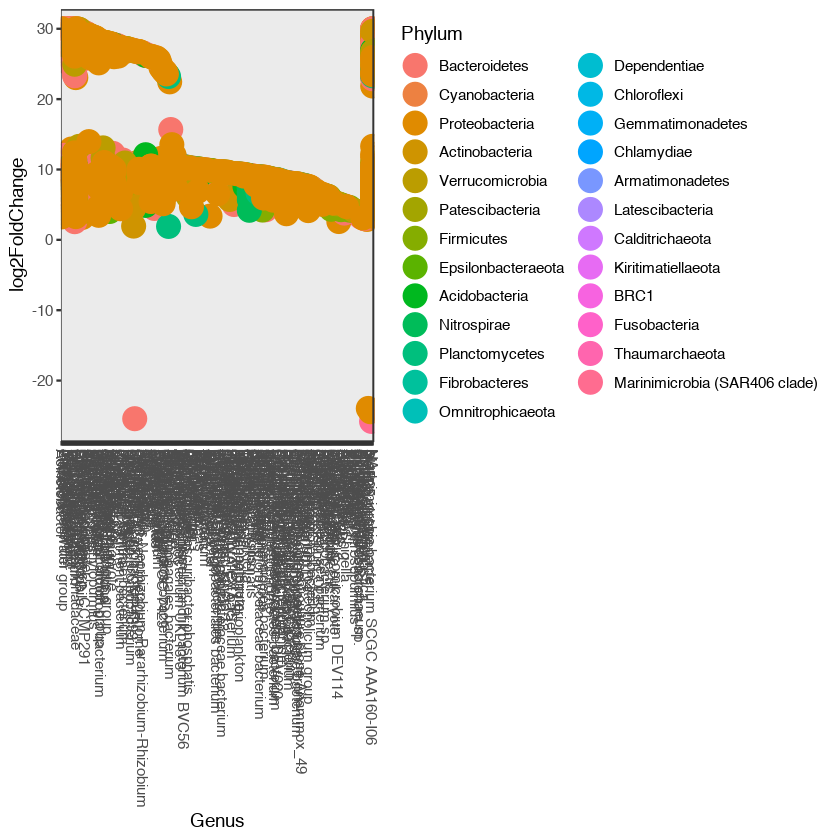

In [73]:
# Genus order
x = tapply(sigtab$log2FoldChange, sigtab$Genus, function(x) max(x))
x = sort(x, TRUE)
sigtab$Genus = factor(as.character(sigtab$Genus), levels=names(x))
ggplot(sigtab, aes(x=Genus, y=log2FoldChange, color=Phylum)) + geom_point(size=6) + 
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))

In [ ]:
# Look at genera only in Proteobacteria
sigtab_proteo <- subset(sigtab, Phylum %in% c("Proteobacteria"))
ggplot(sigtab_proteo, aes(x=Genus, y=log2FoldChange, color=Order)) + geom_point(size=6) + 
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))

In [ ]:

# Look at genera only in Firmicutes
sigtab_firmi <- subset(sigtab, Phylum %in% c("Firmicutes"))
ggplot(sigtab_firmi, aes(x=Genus, y=log2FoldChange, color=Order)) + geom_point(size=6) + 
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))

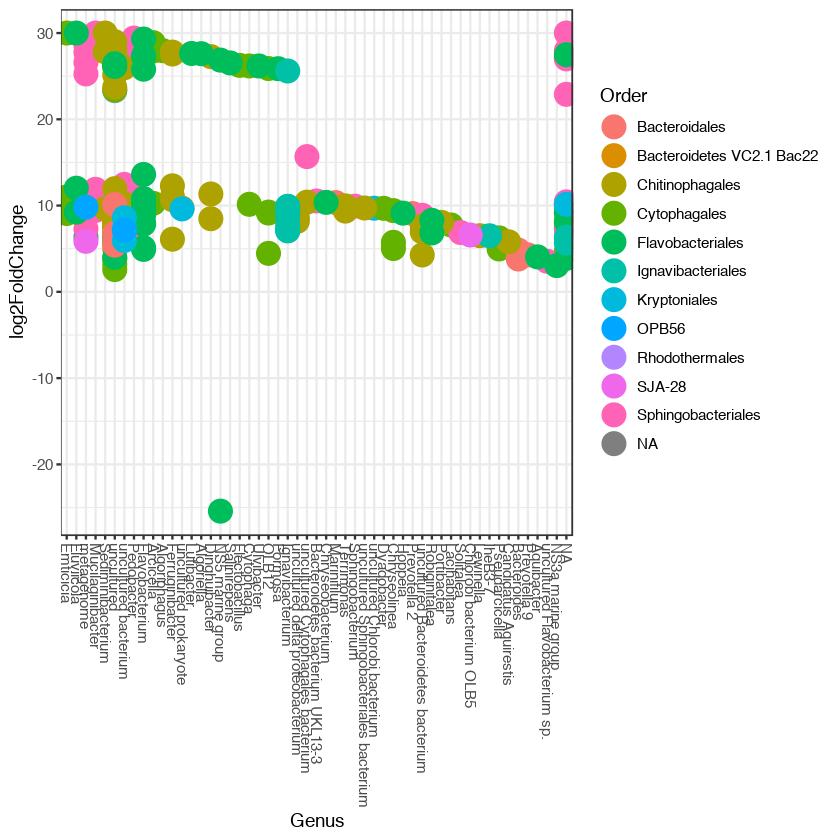

In [74]:
# Look at genera only in Bacteroidetes
sigtab_bacteroid <- subset(sigtab, Phylum %in% c("Bacteroidetes"))
ggplot(sigtab_bacteroid, aes(x=Genus, y=log2FoldChange, color=Order)) + geom_point(size=6) + 
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))


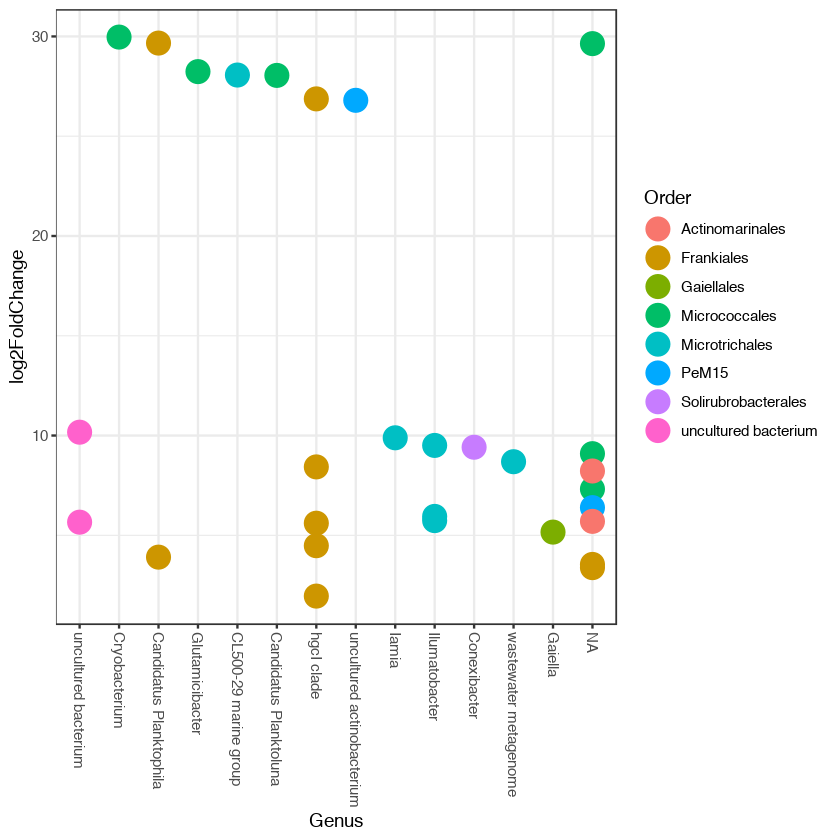

In [75]:
# Look at genera only in Actinobacteria
sigtab_actino <- subset(sigtab, Phylum %in% c("Actinobacteria"))
ggplot(sigtab_actino, aes(x=Genus, y=log2FoldChange, color=Order)) + geom_point(size=6) + 
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))

In [76]:
### Bar Plots
# follow https://github.com/joey711/phyloseq/issues/901


In [77]:
# this line takes a while to run
 df <- psmelt(ps_ra)  

In [ ]:
# Define the number of colors you want
library(RColorBrewer)
nb.cols <- length(unique(df$Phylum))


In [ ]:
# Build plot
p <- ggplot(data=df, aes(x=Sample, y=Abundance, fill=Phylum)) + 
  geom_bar(aes(), stat="identity", position="stack") +
  theme(legend.position="bottom") + guides(fill=guide_legend(nrow=6)) +
  theme(legend.text = element_text(size = 8)) +
  scale_fill_manual(values = colorRampPalette(brewer.pal(12, "Paired"))(nb.cols)) +
  ylim(0,1)

In [ ]:
p